[[ 1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.  0.]
 [ 1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  1.  0.  1.  0.]
 [ 1.  1.  1.  1.  0.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  1.  1.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  2.  1.  0.]]


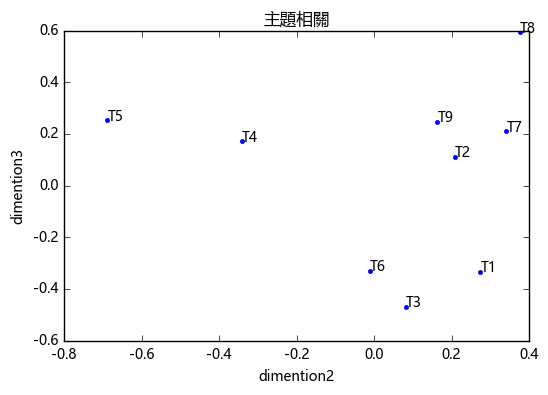

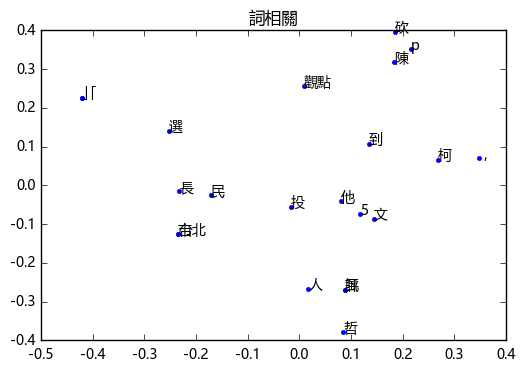

In [2]:
#coding:utf-8
import matplotlib.pyplot as plt
from snownlp import SnowNLP
import matplotlib.pyplot as plt
from numpy import zeros  
import numpy as np  
from scipy.linalg import svd  

# 風媒網 關鍵字[柯文哲、台北市長、柯P]塞選出了文章標題
titles =[  
    u"風評：柯文哲打5大案導致外資投資減少，真假?",  
    u"眼睜睜看著公車經過！柯文哲與陳珮琪多聊2句 遲到5分鐘",  
    u"風評：柯文哲是台北市長，不是中共同路人",  
    u"觀點投書：柯文哲開始「自我內爆」之後的台北市長選舉...",  
    u"民進黨台北市長選戰「黑馬」鄭麗君 蔡其昌籲「黨中央務必考慮這張牌」",  
    u"獨家民調：柯文哲連任台北市長的法寶 就靠這群人愛他",  
    u"為何柯P上任3年，做到那麼多前人沒做的?員工一句話，讓他悟出做老闆該有的高度",  
    u"羅智強觀點：砍柯P砍到鄭文燦，陳金德是超級豬隊友",  
    u"陳昭南專欄：到底是誰在抹紅柯P?"  
]  
stopwords = ['的','是','與','不']  
ignorechars = ''',:'!?：.！'''  

# 預處理，把不要的符號去掉
for i in ignorechars:
    for a in range(len(titles)):
        titles[a] = titles[a].replace(i,'')

for i in ignorechars:
    for a in titles:
        a.replace(' ',i)

  
class LSA(object):  
    def __init__(self, stopwords, ignorechars):  
        self.stopwords = stopwords  
        self.ignorechars = ignorechars  
        self.wdict = {}  
        self.dcount = 0  

    def parse(self, doc):  
        
        s = SnowNLP(doc)
        words = s.words
        for w in words:  
            #print self.dcount  
            w = w.lower() 
            if w in self.stopwords: # 這可省略  
                continue  
            elif w in self.wdict:  
                self.wdict[w].append(self.dcount)  
            else:  
                self.wdict[w] = [self.dcount]  
        self.dcount += 1  
  
    def build(self):  
        self.keys = [k for k in self.wdict.keys() if len(self.wdict[k]) > 1]  
        self.keys.sort() # 排序
        self.A = zeros([len(self.keys), self.dcount])  
        for i, k in enumerate(self.keys):  
            for d in self.wdict[k]:  
                self.A[i,d] += 1  
      
      
    def printA(self):  
        print (self.A)
        
        # SVD分解
        # u 表示在語料庫的頻繁度
        # s 類詞與文章類的相關性
        # vt主題 - 類文章
        u,s,vt = svd(self.A)  
          
        plt.title("標題")  
        plt.xlabel(u'dimention2')  
        plt.ylabel(u'dimention3')  
  
        titles = ['T1','T2','T3','T4','T5','T6','T7','T8','T9']  
        vdemention2 = vt[1]  
        vdemention3 = vt[2]  
        
        # 每個點旁邊備註文字
        for j in range(len(vdemention2)):  
            plt.text(vdemention2[j],vdemention3[j],titles[j])   
        plt.plot(vdemention2, vdemention3, '.')          
        plt.show()
        
        plt.title(u"詞")  
        ut = u.T  
        demention2 = ut[1]  
        demention3 = ut[2] 
        for i in range(len(demention2)):  
            plt.text(demention2[i],demention3[i],self.keys[i])   
        plt.plot(demention2, demention3, '.')  
        plt.show()
          
                  
mylsa = LSA(stopwords, ignorechars)  
for t in titles:  
    mylsa.parse(t)  
mylsa.build()  
mylsa.printA()  